# Setup

## Add github functions and so on

In [ ]:
!git clone https://github.com/IgnacioOQ/twitter-ai

Cloning into 'twitter-ai'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 40 (delta 18), reused 28 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 18.58 KiB | 18.58 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
%cd twitter-ai

/content/twitter-ai


In [ ]:
!pip install python-igraph matplotlib
!pip install igraph
!pip install leidenalg
!pip install --upgrade python-igraph
!pip install powerlaw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.6 MB/s eta 0:00:00


In [ ]:
from imports import *
from network_utils import *
from network_prunning import *
from network_modularity import *

## Basics

In [ ]:
from datetime import timedelta
import json
# import time
# import datetime
from datetime import datetime, timezone
import gc, os
# from tqdm import tqdm
import pickle
# import numpy as np
# import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
import re
import sys
import copy # Needed for the new function

# %%
# ──────────────────────────────────────────────────────────────────────────────
# 1. Drive Mount & Paths
# ──────────────────────────────────────────────────────────────────────────────
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

# Base project folder (Ignacio standard)
BASE = Path('/content/drive/My Drive/Colab Projects/AI Public Trust')


twits_folder = BASE / 'Raw Data/Twits/'
test_folder = BASE / 'Raw Data/'
print("Current Directory:", twits_folder)
datasets_folder = BASE / 'Data Sets'
cleanedds_folder = BASE / 'Data Sets' / 'Cleaned Data'
networks_folder = BASE / 'Data Sets' / 'Networks'
# networks_folder = '/content/drive/MyDrive/AI Public Trust/Data Sets/Networks/'

Mounted at /content/drive
Current Directory: /content/drive/My Drive/Colab Projects/AI Public Trust/Raw Data/Twits


# Loading Network and Taking a Look

Loading Network...
Loaded network with 3379040 nodes and 7768720 edges.
Plotting Report
-------------------------
## Network Summary ##
-------------------------
Network Type: Directed
Number of nodes (V): 3379040
Number of edges (E): 7768720
Is Weighted: True
Average Degree: 2.2991
Density: 0.000001
Gini Coefficient (Degree): 0.5339
Number of Weakly Connected Components: 49464
Number of self-loops: 32216
-------------------------

## Detailed Node and Edge Example ##
-----------------------------------
🔍 Inspecting Node: '858456778454876161'

Attributes of Node '858456778454876161':
  - This node has no attributes.

Edges connected to Node '858456778454876161':
Example Edge: ('858456778454876161', '1513235298192437262')
Attributes of this edge:
  - weight: 1
-----------------------------------
-------------------------


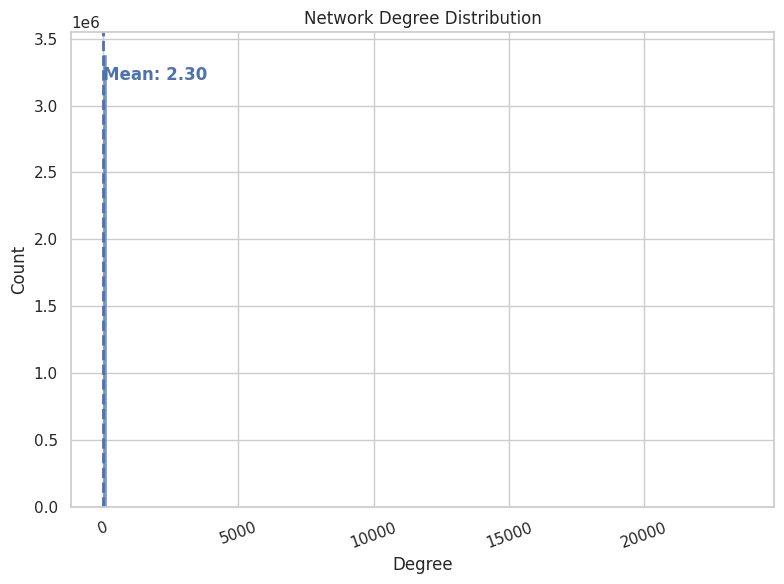

-------------------------


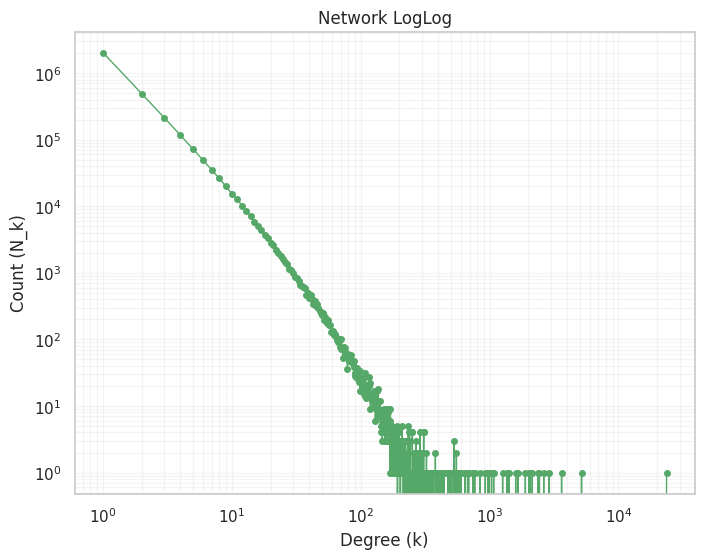

-------------------------
--- 0. Extracting data from graph (mode: 'out') ---

--- 1. Calculating Percentiles ---
~90% of nodes have strength <= 5 (Actual coverage: 90.58%)
~95% of nodes have strength <= 9 (Actual coverage: 95.27%)
~99% of nodes have strength <= 28 (Actual coverage: 99.05%)

--- 2. Fitting Power Law (Method: 'tail') ---
Fit results on the full distribution:
Alpha (α): 2.7488
Xmin (xₘᵢₙ): 40.0000
Sigma (σ): 0.0133

--- 3. Distribution Comparison ---


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Power Law vs. Lognormal: Loglikelihood Ratio R=0.0513, p-value=0.9400
Verdict: Not statistically significant. Cannot conclude one is a better fit than the other.

--- 4. Generating Plot ---


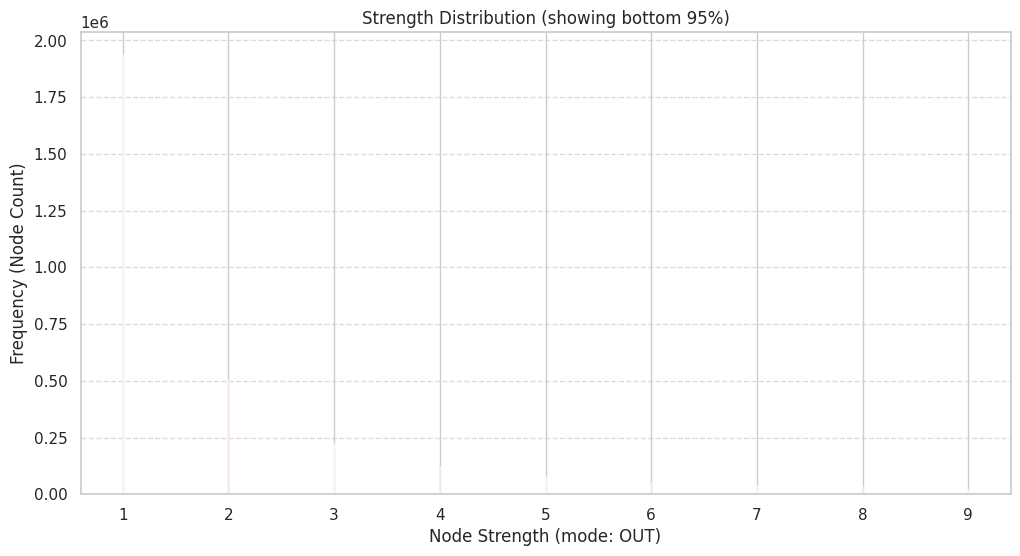

CPU times: user 6min 2s, sys: 4.26 s, total: 6min 7s
Wall time: 6min 9s


In [ ]:
%%time
# --- Load Your Network ---
# Make sure to define 'networks_folder' or replace it with the direct path
try:
    print('Loading Network...')
    gml_file_path = networks_folder / 'Full_Network.gml'
    G = nx.read_gml(gml_file_path)
    print(f"Loaded network with {len(G.nodes())} nodes and {len(G.edges())} edges.")
    plot_report(G)

except FileNotFoundError:
    print(f"Error: The file '{gml_file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while processing the graph: {e}")

# Prunning

## Just LWCC

Loading graph from: /content/drive/My Drive/Colab Projects/AI Public Trust/Data Sets/Networks/Full_Network.gml

Removing self-loops...
Report and Plots
Plotting Report
-------------------------
## Network Summary ##
-------------------------
Network Type: Directed
Number of nodes (V): 3264499
Number of edges (E): 7670516
Is Weighted: True
Average Degree: 2.3497
Density: 0.000001
Gini Coefficient (Degree): 0.5315
Number of Weakly Connected Components: 1
Number of self-loops: 0
-------------------------

## Detailed Node and Edge Example ##
-----------------------------------
🔍 Inspecting Node: '548205162'

Attributes of Node '548205162':
  - id: 638311.0
  - label: 548205162

Edges connected to Node '548205162':
Example Edge: ('548205162', '555311904')
Attributes of this edge:
  - weight: 1.0
-----------------------------------
-------------------------


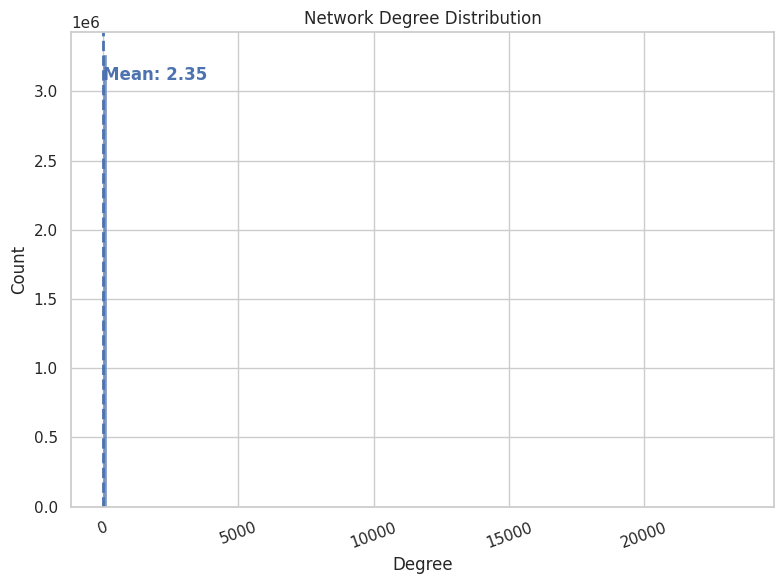

-------------------------


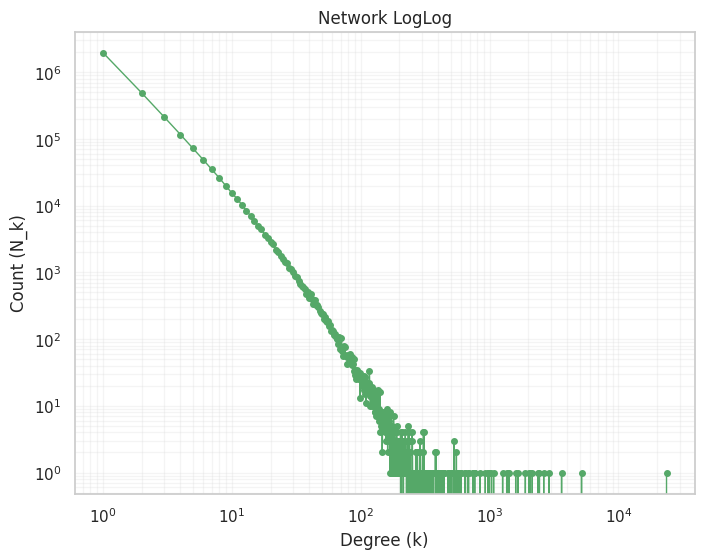

-------------------------
--- 0. Extracting data from graph (mode: 'out') ---

--- 1. Calculating Percentiles ---
~90% of nodes have strength <= 5.0 (Actual coverage: 90.44%)
~95% of nodes have strength <= 9.0 (Actual coverage: 95.20%)
~99% of nodes have strength <= 28.0 (Actual coverage: 99.05%)

--- 2. Fitting Power Law (Method: 'tail') ---
Fit results on the full distribution:
Alpha (α): 2.7614
Xmin (xₘᵢₙ): 40.0000
Sigma (σ): 0.0135

--- 3. Distribution Comparison ---


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Power Law vs. Lognormal: Loglikelihood Ratio R=0.0489, p-value=0.9403
Verdict: Not statistically significant. Cannot conclude one is a better fit than the other.

--- 4. Generating Plot ---


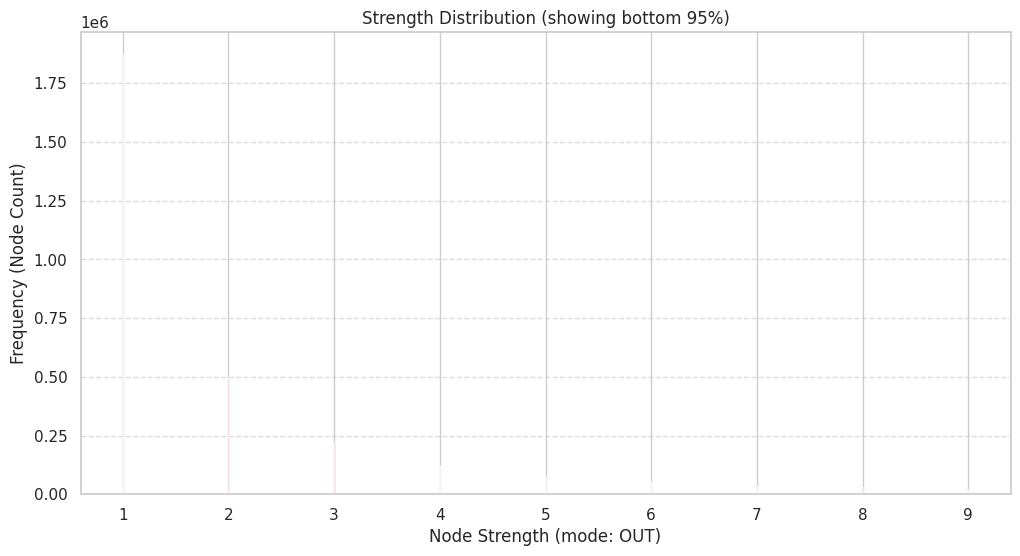

CPU times: user 3min 14s, sys: 4.64 s, total: 3min 19s
Wall time: 3min 26s


In [ ]:
%%time
# --- Paths ---
base = Path(networks_folder)
in_path  = base / "Full_Network.gml"
out_gml1 = base / "LWCC.gml"
out_nx = base / 'LWCC.graphml'

# --- Load ---
print(f"Loading graph from: {in_path}")

g = ig.Graph.Read_GML(str(in_path))

# --- Remove self-loops ---
print("\nRemoving self-loops...")
g_no_loops = g.simplify(loops=True, multiple=False)

# --- Find LWCC ---
g_lwcc = g_no_loops.components(mode='weak').giant()

# --- Save (GML) ---
try:
    g_lwcc.write_gml(str(out_gml1))  # available in many igraph versions
except AttributeError:
    g_lwcc.save(str(out_gml1), format="gml")  # portable fallback
    print(f"\nSaved largest component to: {out_gml1}")

# --- Change to NX ----
G = ig_to_nx_fast(g_lwcc)

# Save to GraphML
nx.write_graphml(G, out_nx)

# --- Report ---
print('Report and Plots')
plot_report(G)

## By Total Weight Deletion

Loading graph from: /content/drive/My Drive/Colab Projects/AI Public Trust/Data Sets/Networks/Full_Network.gml
Prunning...

PRUNING OPERATION: Method='total_strength', Keep=90%
## Full graph (before) ##
Vertices: 3,379,040  Edges: 7,768,720
Found 32216 self-loops.

Removing self-loops...

## Graph (after removing loops) ##
Vertices: 3,379,040  Edges: 7,736,504
Adding 'name' attribute to vertices for safe deletion identification...
🎯 Goal: Keep 8,578,620.00 weight
   (Max weight to lose: 953,180.00)
1. Calculating node scores and sorting (lowest to highest)...
2. Calculating nodes to remove (static pass)...
   Nodes to remove: 985,001 | Weight lost:   952,738.00 (10.0%)
   -> Stopping. Removing next node (rank 985443) would exceed loss budget.

   Calculation complete. Identified 985,443 nodes for removal.
3. Creating final graph by deleting all nodes at once...
4. Extracting the largest weakly connected component...

## Final Graph Summary (FAST) ##
**Method**: total_strength
**LWCC Ve

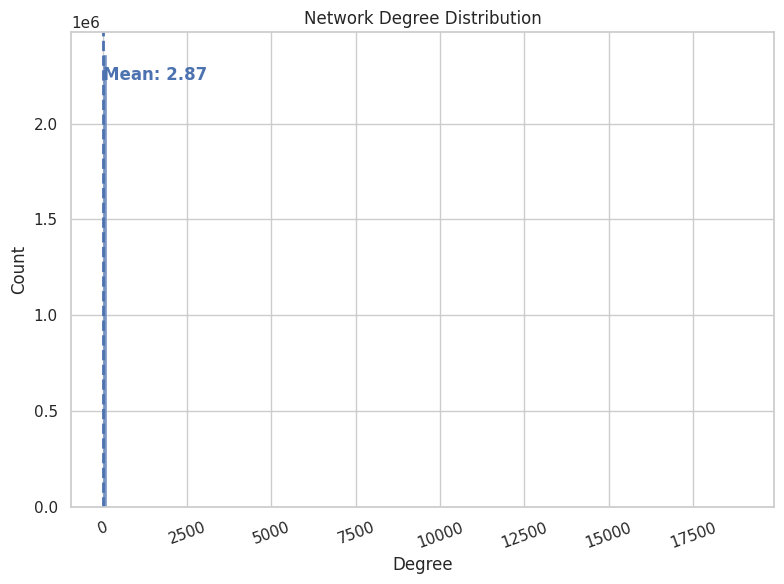

-------------------------


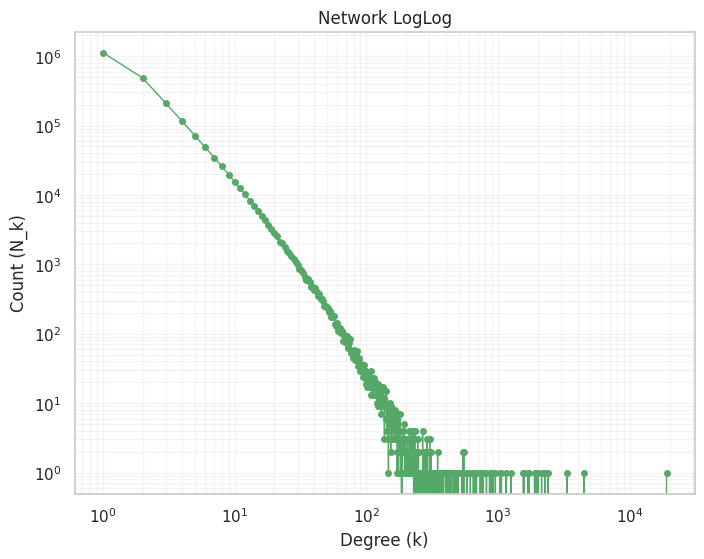

-------------------------
--- 0. Extracting data from graph (mode: 'out') ---

--- 1. Calculating Percentiles ---
~90% of nodes have strength <= 7.0 (Actual coverage: 91.09%)
~95% of nodes have strength <= 12.0 (Actual coverage: 95.47%)
~99% of nodes have strength <= 33.0 (Actual coverage: 99.00%)

--- 2. Fitting Power Law (Method: 'tail') ---
Fit results on the full distribution:
Alpha (α): 2.7675
Xmin (xₘᵢₙ): 39.0000
Sigma (σ): 0.0133

--- 3. Distribution Comparison ---


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Power Law vs. Lognormal: Loglikelihood Ratio R=0.0587, p-value=0.9313
Verdict: Not statistically significant. Cannot conclude one is a better fit than the other.

--- 4. Generating Plot ---


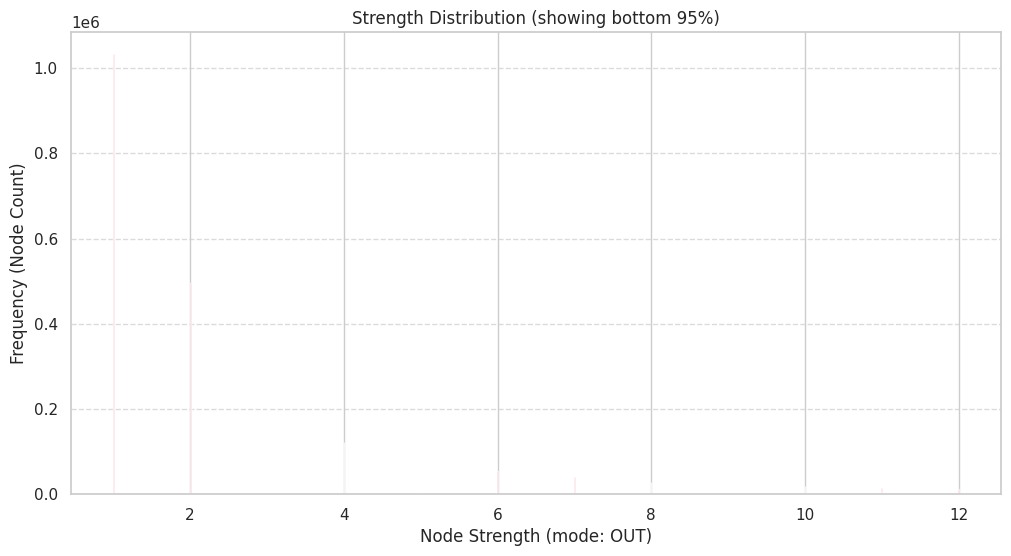

CPU times: user 17h 43min 11s, sys: 14 s, total: 17h 43min 25s
Wall time: 17h 43min 49s


In [ ]:
%%time
prune= True
if prune:
  # --- Paths ---
  base = Path(networks_folder)
  in_path  = base / "Full_Network.gml"
  out_gml1 = base / "90TS_LWCC.gml"
  out_nx = base / '90TS_LWCC.graphml'

  # --- Load ---
  print(f"Loading graph from: {in_path}")

  g = ig.Graph.Read_GML(str(in_path))

  # --- Prune ----
  print(f"Prunning...")
  pruned_g = prune_network_by_deletion(g, method='total_strength', percentage_to_keep=0.90)

  # --- Save (GML) ---
  try:
      pruned_g.write_gml(str(out_gml1))  # available in many igraph versions
  except AttributeError:
      pruned_g.save(str(out_gml1), format="gml")  # portable fallback
      print(f"\nSaved largest component to: {out_gml1}")

  # --- Change to NX ----
  G = ig_to_nx_fast(pruned_g)

  # Save to GraphML
  nx.write_graphml(G, out_nx)

  # --- Report ---
  print('Report and Plots')
  plot_report(G)


## By Threshold

Loading graph from: /content/drive/My Drive/Colab Projects/AI Public Trust/Data Sets/Networks/Full_Network.gml
Prunning...

--- Pruning with method: 'out_strength_threshold >= 1.0' ---
## Full graph (before) ##
Vertices: 3,379,040  Edges: 7,768,720
Found 32216 self-loops.
IGRAPH D-W- 3379040 7768720 -- 
+ attr: id (v), label (v), weight (e)

Removing self-loops...

## Graph (after removing loops) ##
Vertices: 3,379,040  Edges: 7,736,504
Found 0 self-loops after simplification.
1. Identifying nodes with out-strength >= 1.0...
   Found 3,159,105 nodes to keep (out of 3,379,040).
2. Creating the pruned graph...
3. Extracting the largest weakly connected component...
   Done.

## Final Graph Comparison ##
**Method**: Out-Strength Threshold (>= 1.0)
---------------------------------------------------------
| Metric     |     Original | Final (LWCC) |     % Reduction |
---------------------------------------------------------
| Nodes      |    3,379,040 |    1,984,599 |          41.27% |
| E

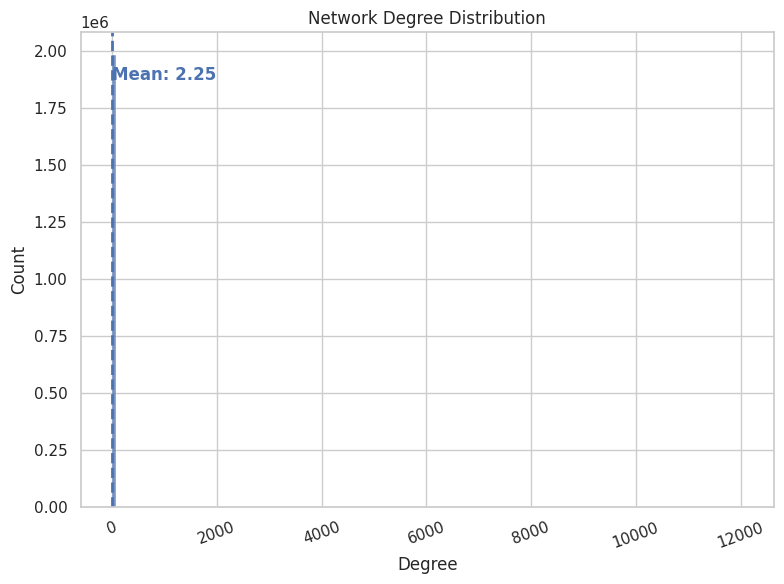

-------------------------


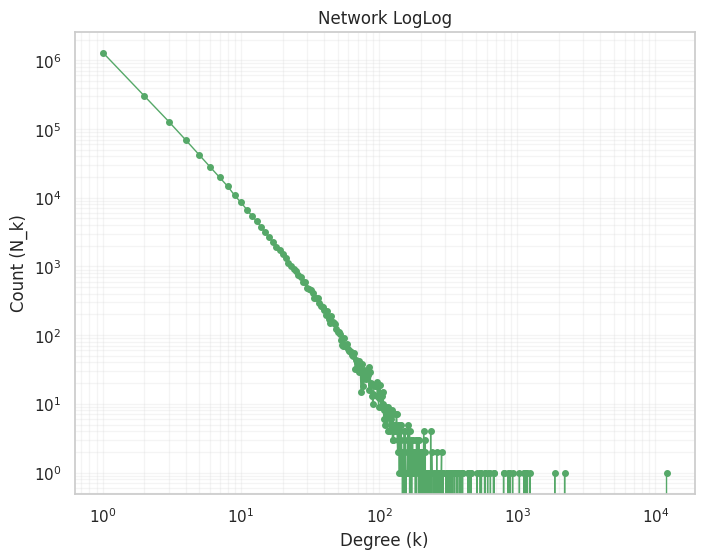

-------------------------
--- 0. Extracting data from graph (mode: 'out') ---

--- 1. Calculating Percentiles ---
~90% of nodes have strength <= 5.0 (Actual coverage: 91.09%)
~95% of nodes have strength <= 9.0 (Actual coverage: 95.56%)
~99% of nodes have strength <= 26.0 (Actual coverage: 99.01%)

--- 2. Fitting Power Law (Method: 'tail') ---
Fit results on the full distribution:
Alpha (α): 2.7094
Xmin (xₘᵢₙ): 31.0000
Sigma (σ): 0.0137

--- 3. Distribution Comparison ---


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Power Law vs. Lognormal: Loglikelihood Ratio R=-0.2128, p-value=0.7491
Verdict: Not statistically significant. Cannot conclude one is a better fit than the other.

--- 4. Generating Plot ---


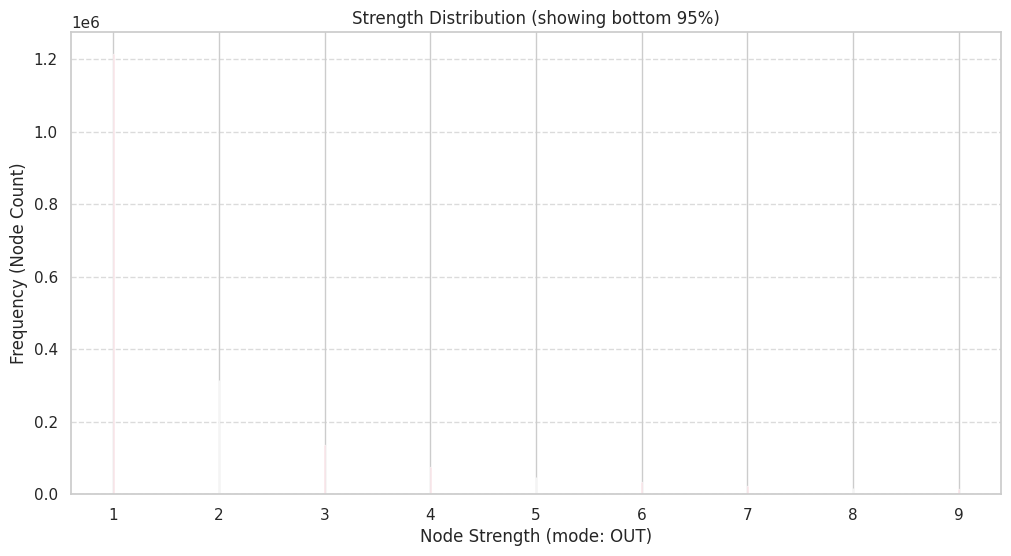

CPU times: user 2min 15s, sys: 2.18 s, total: 2min 17s
Wall time: 2min 21s


In [ ]:
%%time
# --- Paths ---
base = Path(networks_folder)
in_path  = base / "Full_Network.gml"
out_gml1 = base / "Final_OutThreshold1.gml"
out_nx = base / 'Final_OutThreshold1.graphml'

# --- Load ---
print(f"Loading graph from: {in_path}")

g = ig.Graph.Read_GML(str(in_path))

# --- Prune ----
print(f"Prunning...")
pruned_g = prune_by_out_strength_threshold(g, threshold=1.0)

# --- Save (GML) ---
try:
    pruned_g.write_gml(str(out_gml1))  # available in many igraph versions
except AttributeError:
    pruned_g.save(str(out_gml1), format="gml")  # portable fallback
    print(f"\nSaved largest component to: {out_gml1}")

# --- Change to NX ----
G = ig_to_nx_fast(pruned_g)

# Save to GraphML
nx.write_graphml(G, out_nx)

# --- Report ---
print('Report and Plots')
plot_report(G)


# Doing Modularity Analysis and Adding Communities (IGraph)

- https://www.nature.com/articles/s41598-019-41695-z
- Leiden is also modularity maximization.



## From Github

In [ ]:
do_modularity=True
if do_modularity:
    # --- Paths ---
    # base = Path(networks_folder)
    # in_path  = base / "Full_Network.gml"
    # out_gml1 = base / "TS_LWCC_threshold.gml"
    # out_nx = base / 'TS_LWCC_threshold.'
    networks_folder_path = networks_folder

    run_modularity_workflow(
        networks_folder_path,
        input_filename="Final_OutThreshold1.gml",
        method="label_propagation", # Options: 'leiden_full', 'leiden_fast', 'louvain', 'label_propagation'
        resolution=1.0)

    run_modularity_workflow(
    networks_folder_path,
    input_filename="Final_OutThreshold1.gml",
    method="louvain", # Options: 'leiden_full', 'leiden_fast', 'louvain', 'label_propagation'
    resolution=1.0)

    run_modularity_workflow(
    networks_folder_path,
    input_filename="Final_OutThreshold1.gml",
    method="leiden_fast", # Options: 'leiden_full', 'leiden_fast', 'louvain', 'label_propagation'
    resolution=1.0)

# Disconnect from Runtime

In [ ]:
import pytz
from IPython.display import Javascript

# Get the current time in the Europe/Berlin timezone
berlin_tz = pytz.timezone('Europe/Berlin')
berlin_time = datetime.now(berlin_tz)

# Print and log
print(f"✅ Disconnected from runtime at: {berlin_time}")

# Disconnect Colab runtime
display(Javascript('google.colab.kernel.disconnect()'))